<a href="https://colab.research.google.com/github/Pavithra777/EVA-8-Phase-1/blob/main/Assignment%208/session8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Pavithra777/PavithraDevi/main/utils.py
!pip install torch_lr_finder
import utils

--2023-02-24 17:39:01--  https://raw.githubusercontent.com/Pavithra777/PavithraDevi/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7575 (7.4K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   7.40K  --.-KB/s    in 0s      

2023-02-24 17:39:01 (103 MB/s) - ‘utils.py’ saved [7575/7575]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!wget https://raw.githubusercontent.com/Pavithra777/PavithraDevi/main/model.py
!pip install torch_lr_finder
import model as m

--2023-02-24 17:39:07--  https://raw.githubusercontent.com/Pavithra777/PavithraDevi/main/model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5314 (5.2K) [text/plain]
Saving to: ‘model.py’

model.py            100%[===================>]   5.19K  --.-KB/s    in 0s      

2023-02-24 17:39:07 (62.2 MB/s) - ‘model.py’ saved [5314/5314]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
import torch
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, transforms
from tqdm import tqdm
import utils
import model as m
import copy
import matplotlib.pyplot as plt

train_dataset_dict = utils.get_metadata_of_CIFAR10_train_dataset()
train_dataset = train_dataset_dict['dataset'] 

train_agumentation = {A.Normalize((0.49139968, 0.48215841, 0.44653091),(0.24703223 ,0.24348513, 0.26158784)),
                A.HorizontalFlip(),
                A.CoarseDropout(max_holes=1,max_height=8,max_width=8,
                              min_height=8,min_width=8,
                              fill_value= 0.473363,mask_fill_value=None,always_apply=True),
                A.PadIfNeeded(min_height=36, min_width=36, p=0.2,always_apply=True),
                A.RandomCrop(32, 32, always_apply=True, p=0.2)
                }

test_agumentation = {A.Normalize((0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784))
                }

Files already downloaded and verified
[Train]
-Numpy Shape : (50000, 32, 32, 3)
-min: [0. 0. 0.]
-max: [1. 1. 1.]
-mean: [0.49139968 0.48215841 0.44653091]
-std: [0.24703223 0.24348513 0.26158784]
-var: [15.56135559 15.11767693 17.44919073]
-classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
SEED=1
#CUDA?
cuda=torch.cuda.is_available()
print("CUDA Available:",cuda)

#For reproducibility
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED)
  BATCH_SIZE=512
else:
  BATCH_SIZE=512

train_loader,test_loader=utils.get_CIFAR10_dataset(train_agumentation,test_agumentation,BATCH_SIZE)

device= utils.get_device()
print(device)
net=m.CustomResNet().to(device)

CUDA Available: True
Files already downloaded and verified
Files already downloaded and verified
device :  cuda
cuda


In [7]:
import torch.nn as nn
criterion = nn.CrossEntropyLoss()

  0%|          | 0/118 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.39E-03


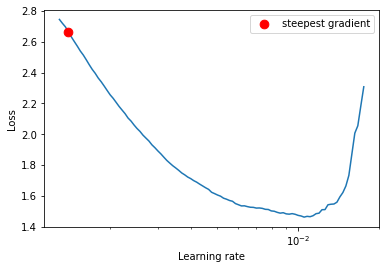

Max LR is 0.01054464913106319


In [22]:
net_exp = copy.deepcopy(net)
optimizer= utils.get_optimizer(net_exp,lr=0.001,momentum=0.9,l2=True)
ler_rate = utils.find_lr(net_exp,optimizer,criterion,0.02,train_loader)

In [23]:
ler_rate = 0.01054464913106319

In [24]:
net1 = copy.deepcopy(net)
optimizer= utils.get_optimizer(net1,lr=ler_rate,momentum=0.9,l2=True)

scheduler =utils.get_scheduler(optimizer,len(train_loader),ler_rate)

_,history =utils.fit_model(net1,device,train_loader,test_loader,scheduler,optimizer,NUM_EPOCHS=24,l1=False,l2=True)

EPOCH: 1


Batch_id=97 Loss=1.70769 Accuracy=38.41: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



 Test set : Average loss: 1.3596, Accuracy: 5059/10000 (50.59%)

EPOCH: 2


Batch_id=97 Loss=1.27974 Accuracy=54.13: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]



 Test set : Average loss: 1.1787, Accuracy: 5832/10000 (58.32%)

EPOCH: 3


Batch_id=97 Loss=1.11969 Accuracy=60.21: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]



 Test set : Average loss: 1.0611, Accuracy: 6258/10000 (62.58%)

EPOCH: 4


Batch_id=97 Loss=1.00911 Accuracy=64.37: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



 Test set : Average loss: 0.9487, Accuracy: 6635/10000 (66.35%)

EPOCH: 5


Batch_id=97 Loss=0.92347 Accuracy=67.59: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]



 Test set : Average loss: 0.9181, Accuracy: 6789/10000 (67.89%)

EPOCH: 6


Batch_id=97 Loss=0.85339 Accuracy=70.03: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



 Test set : Average loss: 0.8364, Accuracy: 7056/10000 (70.56%)

EPOCH: 7


Batch_id=97 Loss=0.80574 Accuracy=71.54: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]



 Test set : Average loss: 0.7891, Accuracy: 7254/10000 (72.54%)

EPOCH: 8


Batch_id=97 Loss=0.76008 Accuracy=73.52: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



 Test set : Average loss: 0.7367, Accuracy: 7426/10000 (74.26%)

EPOCH: 9


Batch_id=97 Loss=0.71154 Accuracy=75.23: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



 Test set : Average loss: 0.7690, Accuracy: 7351/10000 (73.51%)

EPOCH: 10


Batch_id=97 Loss=0.67341 Accuracy=76.53: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]



 Test set : Average loss: 0.6894, Accuracy: 7617/10000 (76.17%)

EPOCH: 11


Batch_id=97 Loss=0.64597 Accuracy=77.33: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]



 Test set : Average loss: 0.6843, Accuracy: 7650/10000 (76.50%)

EPOCH: 12


Batch_id=97 Loss=0.61245 Accuracy=78.79: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]



 Test set : Average loss: 0.6483, Accuracy: 7791/10000 (77.91%)

EPOCH: 13


Batch_id=97 Loss=0.58854 Accuracy=79.66: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]



 Test set : Average loss: 0.6239, Accuracy: 7863/10000 (78.63%)

EPOCH: 14


Batch_id=97 Loss=0.56631 Accuracy=80.30: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



 Test set : Average loss: 0.6285, Accuracy: 7802/10000 (78.02%)

EPOCH: 15


Batch_id=97 Loss=0.54459 Accuracy=80.97: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]



 Test set : Average loss: 0.6298, Accuracy: 7889/10000 (78.89%)

EPOCH: 16


Batch_id=97 Loss=0.52151 Accuracy=81.87: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]



 Test set : Average loss: 0.6073, Accuracy: 7946/10000 (79.46%)

EPOCH: 17


Batch_id=97 Loss=0.50432 Accuracy=82.58: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



 Test set : Average loss: 0.5729, Accuracy: 8105/10000 (81.05%)

EPOCH: 18


Batch_id=97 Loss=0.48069 Accuracy=83.30: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



 Test set : Average loss: 0.5533, Accuracy: 8096/10000 (80.96%)

EPOCH: 19


Batch_id=97 Loss=0.46570 Accuracy=83.81: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]



 Test set : Average loss: 0.5515, Accuracy: 8151/10000 (81.51%)

EPOCH: 20


Batch_id=97 Loss=0.45026 Accuracy=84.55: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]



 Test set : Average loss: 0.5519, Accuracy: 8159/10000 (81.59%)

EPOCH: 21


Batch_id=97 Loss=0.43350 Accuracy=85.04: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]



 Test set : Average loss: 0.5602, Accuracy: 8103/10000 (81.03%)

EPOCH: 22


Batch_id=97 Loss=0.42451 Accuracy=85.21: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



 Test set : Average loss: 0.5493, Accuracy: 8134/10000 (81.34%)

EPOCH: 23


Batch_id=97 Loss=0.40864 Accuracy=85.94: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]



 Test set : Average loss: 0.5270, Accuracy: 8238/10000 (82.38%)

EPOCH: 24


Batch_id=97 Loss=0.38941 Accuracy=86.54: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]



 Test set : Average loss: 0.5196, Accuracy: 8280/10000 (82.80%)



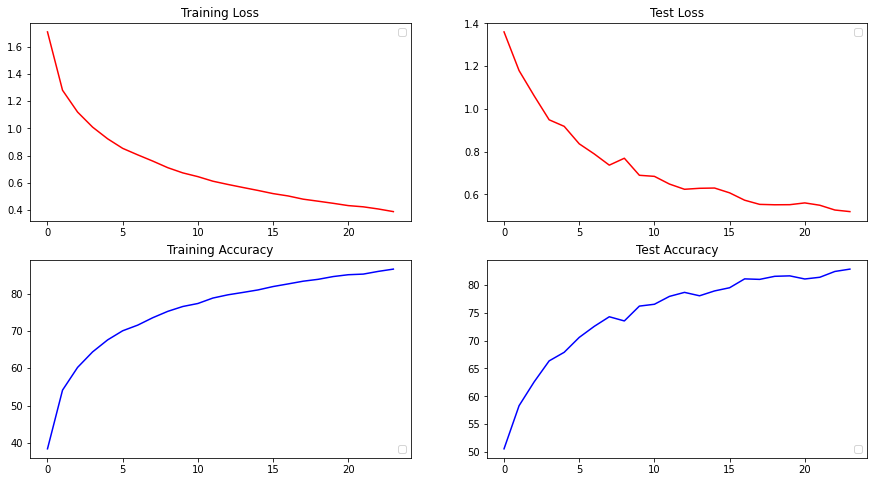

In [25]:
training_acc,training_loss,testing_acc,testing_loss = history

fig, axs = plt.subplots(2,2,figsize=(15,8))
axs[0, 0].plot(training_loss,color='r')
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(training_acc,color='b')
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(testing_loss,color='r')
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(testing_acc,color='b')
axs[1, 1].set_title("Test Accuracy")
leg = axs[0, 0].legend(loc='upper right')
leg = axs[0, 1].legend(loc='upper right')
leg = axs[1, 0].legend(loc='lower right')
leg = axs[1, 1].legend(loc='lower right')